In [1]:
import numpy as np
from scipy.stats import rankdata
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline


In [2]:
# Data Directory

# Path to data in my PC
path = 'C:\\Users\\theab\\OneDrive\\Documents\\Trinity Dublin\\MSc Neuroscience\\Courses\\PRJ - final\\Project\\WHMSTS\\Code and Results\\Files\\Common\\Templates and Inputs\\Data.xlsx'

data = pd.read_excel(path)

# Participants
participants = data['ID']

# Group labels (For easy plotting)
groups = data['Group']

In [3]:
# Constructing a subject by subject matrix

# Number of participants
n_subs = len(participants)

# Ranking the behaviour scores
T1_SRS2_Total = rankdata(data['T1_SRS2_Total'])
T1_SRS2_Awr = rankdata(data['T1_SRS2_Awr'])
T1_SRS2_Cog = rankdata(data['T1_SRS2_Cog'])
T1_SRS2_Com = rankdata(data['T1_SRS2_Com'])
T1_SRS2_Mot = rankdata(data['T1_SRS2_Mot'])
T1_SRS2_RRB = rankdata(data['T1_SRS2_RRB'])

# Setting the default colours
cmap = plt.cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad('#C0C0C0')

# Function to sort n by n matrix
def sort_square_mtx(mtx, vct):
    inds = vct.argsort()
    mtx_sorted = mtx.copy()
    mtx_sorted = mtx_sorted[inds, :]
    mtx_sorted = mtx_sorted[:, inds]

    return mtx_sorted

# Scaling the matrix from 0 to 1
def scale_mtx(mtx):
    return (mtx-np.min(mtx))/(np.max(mtx)-np.min(mtx))

In [4]:
def nn_matrix(x):

    # Initialising a similarity matrix
    nn_mtx = np.zeros((n_subs, n_subs))
    
    # Calculating euclidean distance between each participant
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                # Euclidean distance between the behaviour scores
                dist_ij = 1-(abs(x[i]-x[j])/n_subs)
                nn_mtx[i, j] = dist_ij
                nn_mtx[j, i] = dist_ij

    # Scaling the distance matrix
    nn_mtx = scale_mtx(nn_mtx)
    # Setting diagonal to 1
    np.fill_diagonal(nn_mtx, 1)

    # Plotting
    # fig, ax = plt.subplots()

    # Draw heatmap
    # sns.heatmap(sort_square_mtx(nn_mtx, x), ax=ax, cmap=cmap, square=True, cbar=True, xticklabels=False, yticklabels=False)
    # ax.set_title("Nearest neighbor\n(Model: Euclidean distance)")

    return nn_mtx

In [5]:
def annak_matrix(x):

    # Initialising a similarity matrix
    annak_mtx = np.zeros((n_subs, n_subs))
    
    # Calculating euclidean distance between each participant
    for i in range(n_subs):
        for j in range(n_subs):
            if i < j:
                # Calculating distance between each i and j
                dist_ij = np.mean([x[i]/n_subs, x[j]/n_subs])
                annak_mtx[i, j] = dist_ij
                annak_mtx[j, i] = dist_ij
    
    # Scaling the distance matrix
    annak_mtx = scale_mtx(annak_mtx)
    # Setting diagonal to 1
    np.fill_diagonal(annak_mtx, 1)

    # Plotting
    # fig, ax = plt.subplots()

    # Draw heatmap
    # sns.heatmap(sort_square_mtx(annak_mtx, x), ax=ax, cmap=cmap, square=True, cbar=True, xticklabels=False, yticklabels=False)
    # ax.set_title("Anna Karenina\n(Model: Euclidean distance)")

    return annak_mtx

In [6]:
def plot(x, y, z):

    # Visualising behaviour data
    list_of_matrices = [x, y]

    # Defining subplots
    fig, axes = plt.subplots(len(list_of_matrices), 2, figsize=(8, 10))

    # Arranging subplots
    for m, mtx in enumerate(list_of_matrices):
        ax1 = axes[m, 0]
        ax1.set_title('T1_SRS2 Distance Matrix')
        ax2 = axes[m, 1]

        # Draw heatmap
        if m == 0:
            cbar = True
        else:
            cbar = False

        sns.heatmap(sort_square_mtx(mtx, z), ax=ax1, cmap=cmap, square=True, cbar=cbar, cbar_kws={'label': 'Similarity'}, xticklabels=False, yticklabels=False)

        # t-SNE plot

        # 1 - Similarity Score = Distance
        isc_embedded = TSNE(n_components=2, metric="precomputed").fit_transform(1 - mtx)

        # Scatter plot
        scatter_p = ax2.scatter(isc_embedded[:, 0], isc_embedded[:, 1], c=z, cmap=cmap)
        ax2.set_xticks([])
        ax2.set_yticks([])

        if m == 0:
            ax2.set_xlabel('Component 1')
            ax2.set_ylabel('Component 2')
        
        ax2.axis('square')
        ax2.set(xlim=ax2.get_xlim(), ylim=ax2.get_ylim())

    cbar = fig.colorbar(scatter_p, ax=axes[0, 1], ticks=[-2, 2])
    cbar.ax.set_yticklabels(['Low', 'High'])
    cbar.set_label('Behavior score', labelpad=-5)

    plt.tight_layout()


In [7]:
# Loading the desired data in the dataframe

classify = pd.DataFrame()
classify['total'] = data['T1_SRS2_Total']
classify['awr'] = data['T1_SRS2_Awr']
classify['cog'] = data['T1_SRS2_Cog']
classify['com'] = data['T1_SRS2_Com']
classify['mot'] = data['T1_SRS2_Mot']
classify['rrb'] = data['T1_SRS2_RRB']
classify['target'] = groups
classify.head()

,total,awr,cog,com,mot,rrb,target
0,83,90,78,71,82,86,1
1,81,86,76,86,77,61,1
2,70,70,72,68,62,69,1
3,41,43,39,43,43,42,2
4,41,45,42,41,40,45,2


C:\Users\theab\anaconda3\envs\PRJ\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


<AxesSubplot:>

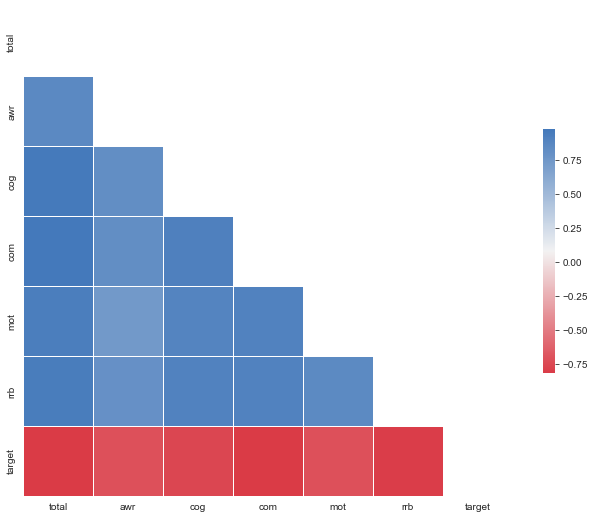

In [8]:
# Computing pairwise correlations for the dataframe

corr = classify.corr()

# Visualising the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style='white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

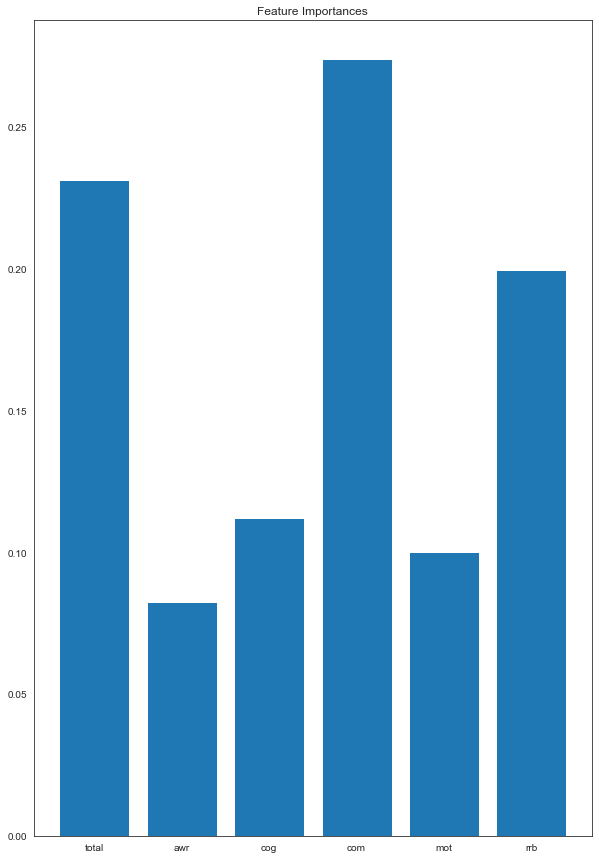

In [9]:
# Finding the most relevant feature

# Defining features
features = classify.drop('target', axis=1).columns

# Making dictionary for the multiple runs
runs = {}
for i in features:
    runs[i] = []

# Using Random Forest Classfier
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

count = 0
while count <= 100:  # can be adjusted as per the need

    # Splitting the set
    X_train, X_test, y_train, y_test = train_test_split(
        classify.drop('target', axis=1), classify['target'], test_size=0.20)
    # Fitting the model
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    for i in runs:
        dict_ind = list(runs.keys()).index(i)
        runs[i].append(importances[dict_ind])
    count = count + 1

# Finding mean importance of each feature
mean_imp = []
for i in features:
    mean_imp.append(np.mean(runs[i]))

# List of features
lf = list(features)

# Plotting feature importances
plt.figure(figsize=(10, 15))
plt.title('Feature Importances')
plt.bar(lf, mean_imp)
plt.show()


In [10]:
# T1_SRS2_Total

# nn1 = nn_matrix(T1_SRS2_Total)
# annak1 = annak_matrix(T1_SRS2_Total)
# plot(nn1, annak1, T1_SRS2_Total)


In [11]:
# T1_SRS2_Awr

# nn2 = nn_matrix(T1_SRS2_Awr)
# annak2 = annak_matrix(T1_SRS2_Awr)
# plot(nn2, annak2, T1_SRS2_Awr)

In [12]:
# T1_SRS2_Cog

# nn3 = nn_matrix(T1_SRS2_Cog)
# annak3 = annak_matrix(T1_SRS2_Cog)
# plot(nn3, annak3, T1_SRS2_Cog)


C:\Users\theab\anaconda3\envs\PRJ\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning
C:\Users\theab\anaconda3\envs\PRJ\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


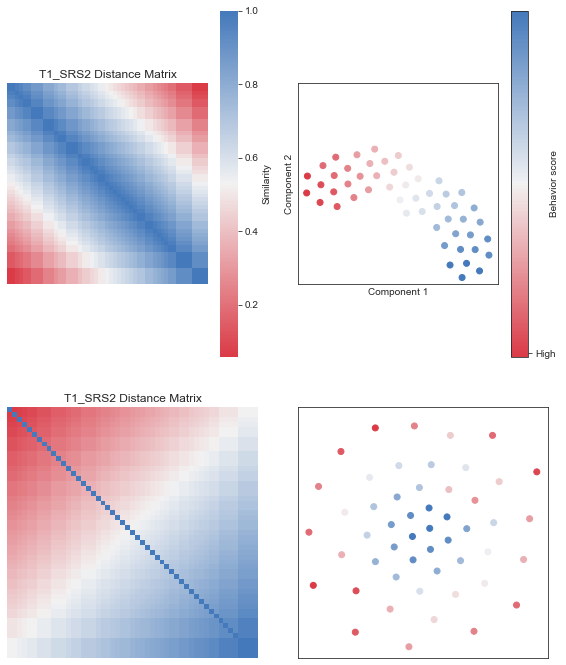

In [16]:
# T1_SRS2_Com

nn4 = nn_matrix(T1_SRS2_Com)
annak4 = annak_matrix(T1_SRS2_Com)
plot(nn4, annak4, T1_SRS2_Com)

In [14]:
# T1_SRS2_Mot

# nn5 = nn_matrix(T1_SRS2_Mot)
# annak5 = annak_matrix(T1_SRS2_Mot)
# plot(nn5, annak5, T1_SRS2_Mot)

In [15]:
# T1_SRS2_RRB

# nn6 = nn_matrix(T1_SRS2_RRB)
# annak6 = annak_matrix(T1_SRS2_RRB)
# plot(nn6, annak6, T1_SRS2_RRB)